Formação Cientista de Dados II - Professor Fernando Amaral
Clusters: Técnicas Avançadas

In [5]:
#!pip install pyclustertend

# Imports

In [7]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from pyclustertend import hopkins, vat,ivat, assess_tendency_by_metric, assess_tendency_by_mean_metric_score

# Carregar a base

In [8]:
#cluster com iris
iris = datasets.load_iris()
cluster = KMeans(n_clusters = 3)
clus = cluster.fit_predict(iris.data)
print(clus)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


# Analise da base

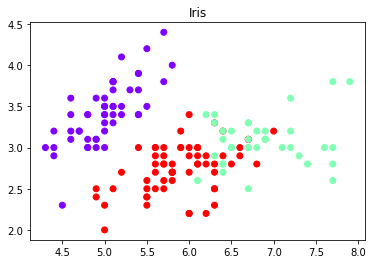

In [9]:
#impressão do cluster
plt.title('Iris')
plt.scatter(iris.data[:,0], iris.data[:,1], c = clus, cmap="rainbow")
plt.show()

# Aplicar as técnicas de cluster

In [10]:
#criamos dois objetos para clusterização
clust1 = scale(iris.data)
#mesmas dimensões de Iris
clust2 = np.random.rand(150,4)
print(clust2)

[[0.30757577 0.38424977 0.97590213 0.3337914 ]
 [0.02755527 0.78758045 0.73965563 0.00487679]
 [0.85925221 0.04127181 0.0171123  0.05694876]
 [0.54955532 0.16233841 0.36368062 0.12736168]
 [0.81122435 0.43942712 0.26888602 0.69127234]
 [0.58276082 0.67154136 0.43294472 0.67756395]
 [0.44346268 0.16867884 0.66365711 0.51928954]
 [0.38852413 0.74933915 0.81995626 0.53975827]
 [0.48253692 0.70711068 0.32453042 0.95344411]
 [0.90467376 0.40509728 0.17568678 0.51131852]
 [0.59668145 0.22347182 0.99283413 0.13519599]
 [0.77547049 0.89473667 0.0968964  0.77536814]
 [0.93509474 0.89416371 0.16176962 0.62615327]
 [0.07970464 0.8156534  0.13257829 0.22886215]
 [0.1940077  0.50480148 0.21021407 0.8176534 ]
 [0.63500848 0.13681865 0.90146105 0.86343451]
 [0.68644026 0.94245476 0.14021474 0.76997627]
 [0.70746972 0.11590456 0.57007847 0.30959997]
 [0.51442411 0.76217767 0.30304082 0.4655296 ]
 [0.54836877 0.79722094 0.98869128 0.01775215]
 [0.15974525 0.15389821 0.19932421 0.33759992]
 [0.24532077 

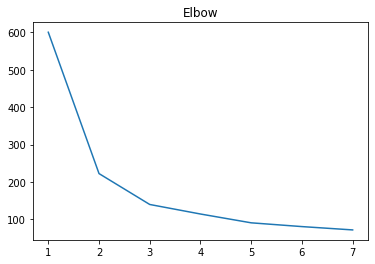

In [11]:
# within-cluster sum-of-squares pode ser encontrado no atributo inertia do cluster
inertia =[]
for i in range(1, 8):
    kmeans = KMeans(n_clusters = i).fit(clust1)
    kmeans.fit(clust1)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 8), inertia)
plt.title('Elbow')
plt.show()

o método elbow é o método mais comum para saber o numero de cluster, não tem um framework para ele.

# Visualizar e aplicá-las

In [12]:
#caapcidade de cluster
#mais proximo de zero maior capacidade
hopkins(clust1,150)

0.1820502719687029

In [13]:
hopkins(clust2,150)

0.49755631111705306

Estatística shopkins para capacidade de clusterização dos dados.

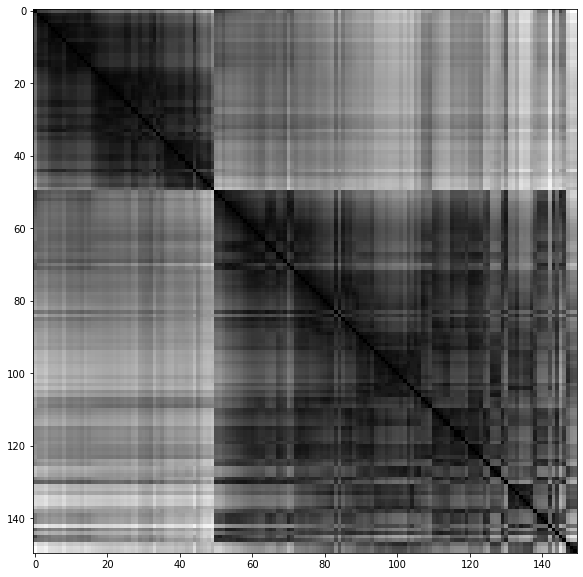

In [14]:
#Visual assesement of tendency
vat(clust1)

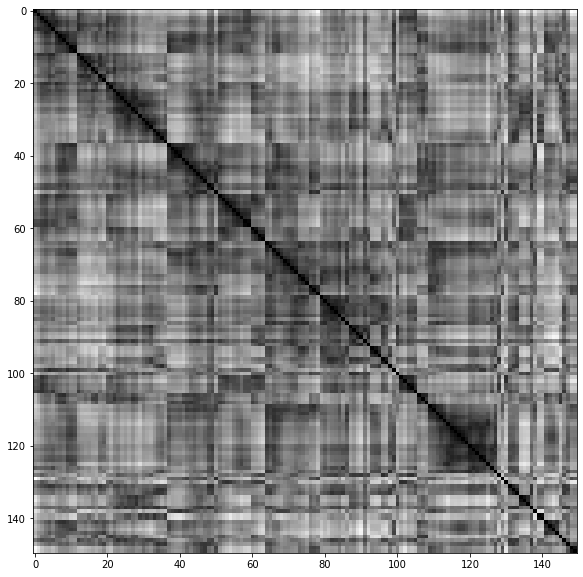

In [15]:
vat(clust2)

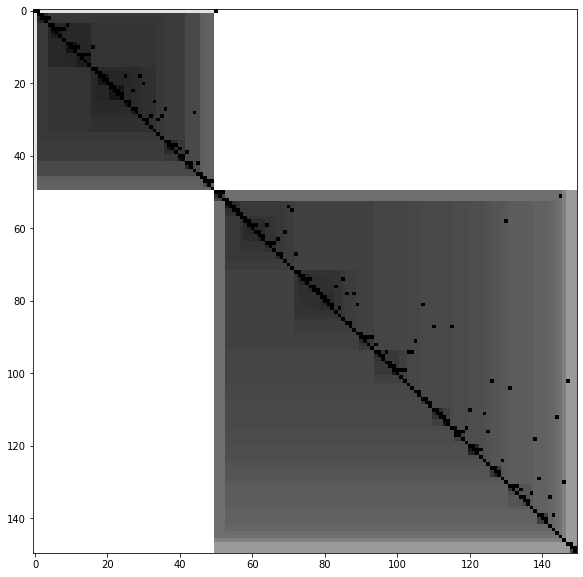

In [16]:
#outra versão
ivat(clust1)  

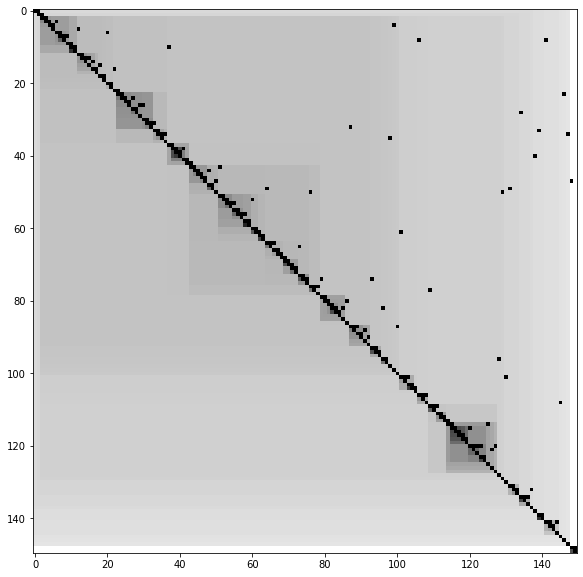

In [17]:
ivat(clust2)  

In [18]:
# avalia a qualidade dos dados 
#métodos  'silhouette', 'calinski_harabasz', 'davies_bouldin'    
#dados, método, número máximo de clusters
#retona o número ideial de cluster a valor de silhouette para cada um
#silhouette busca minimizar
m = assess_tendency_by_metric(clust1,'silhouette',5 )
print(m)

(2, array([0.58175005, 0.45994824, 0.38694104, 0.34590128]))


In [19]:
m = assess_tendency_by_metric(clust2,'silhouette',5 )
print(m)

(5, array([0.20433186, 0.20796155, 0.22395951, 0.25041743]))


In [20]:
#retorna o número médio do melhor número de clusters dos três métodos
m = assess_tendency_by_mean_metric_score(clust1,5 )
print(m)

2.0


In [21]:
m = assess_tendency_by_mean_metric_score(clust2,5 )
print(m)


5.0
